This demo shows how lexrank works on a single document summarization.

### Step 0. Prepare the corpus.
Download your English working paper from https://www.icao.int/Meetings/A40/Pages/wp.aspx .

In [1]:
# get the path of PDF
pdf_path = 'corpus/assembly_wp/a40/a40_wp_052_en.pdf'

### Step 1. Extract the text from the working paper which you would like to summarize.

In [2]:
from utils import *
# extract all content in PDF
# if working paper is after A35, 
# recomand to use extract_pdf_plumber,
# otherwise use extract_pdf_content.
# Because extract_pdf_content may cause disorder of phrases in sentence.
content_plumber = extract_pdf_plumber(pdf_path)
content_plumber
# content = extract_pdf_content(pdf_path)
# content

'  A40-WP/52 \nInternational Civil Aviation Organization  TE/6 \n  17/6/19  \n \nWORKING PAPER \n \n \nASSEMBLY — 40TH SESSION \n \nTECHNICAL COMMISSION \n   \n \nAgenda Item 28: Aviation Safety and Air Navigation Policy \n \nUPDATES TO ASSEMBLY RESOLUTIONS RELATING TO SAFETY MANAGEMENT \n \n(Presented by the Council of ICAO) \n   \nEXECUTIVE SUMMARY \nThe protection of safety information is essential to ensure its continued availability, since the use of \nsafety information for purposes other than maintaining or improving safety may inhibit the future \navailability of such information, with an adverse effect on safety. Assembly Resolutions A38-3 and \nA38-4 instructed the Council, inter alia, to take such steps as may be necessary to ensure meaningful \nprogress toward  the  development  of  new  and/or  enhanced provisions for  the protection  of  safety \ninformation  in  Annex  13  —  Aircraft  Accident  and  Incident  Investigation,  Annex  19  —  Safety \nManagement, other Anne

In [3]:
# get cleaned main body text
# if you use extract_pdf_plumber in the former step,
# use main_body_plumber(content_plumber),
# otherwise use get_main_body(content).
text = main_body_plumber(content_plumber)
# text = get_main_body(content)
text

'Aviation safety activities have always relied on the constant flow of safety information. Historically, information derived from accident and incident records formed the backbone of activities aimed at improving aviation safety. The evolution of safety management along with new recording technologies has expanded the types of data and information used to maintain or improve safety. The 38th Session of the Assembly, held in Montréal from 24 September to 4 October 2013, adopted Assembly Resolutions A38-3: Protection of certain accident and incident records and A38-4: Protecting information from safety data collection and processing systems in order to maintain and improve aviation safety, instructing the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Management, other Ann

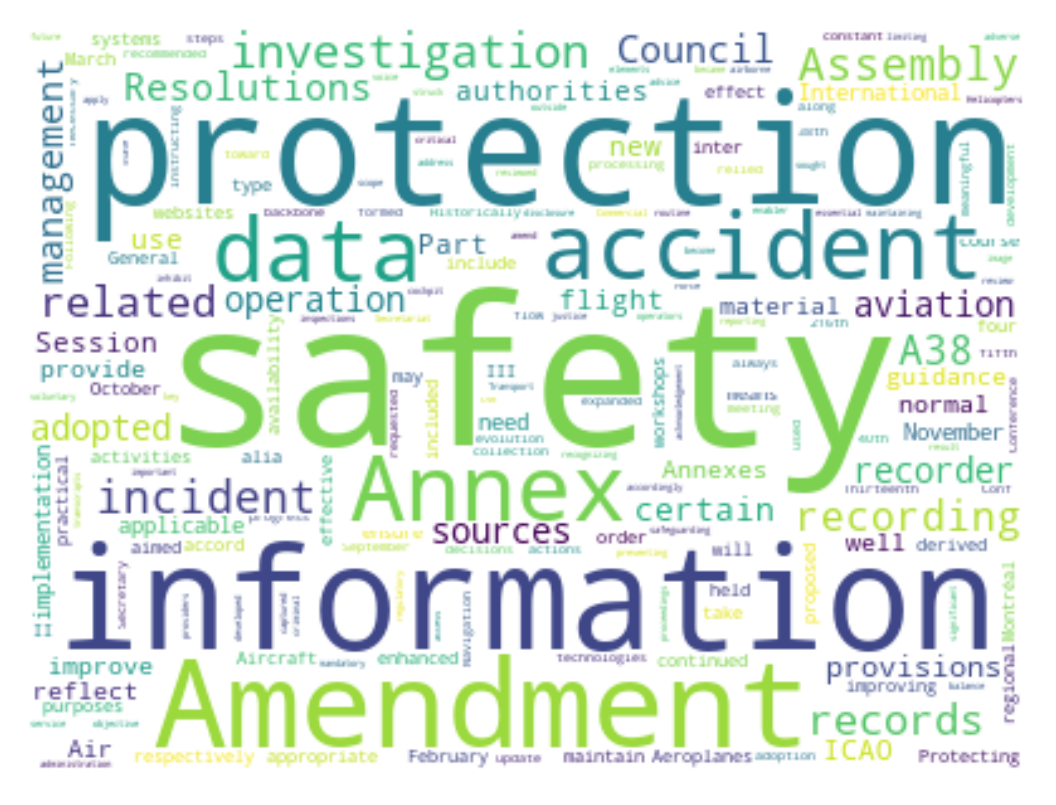

In [4]:
# Extra: have a word cloud
get_wordcloud(text)

### Step 2. Pre-processing the text into sentences, format required by model.

In [5]:
# sentence segmentation
raw_sent = sent_segment(text)
raw_sent

['Aviation safety activities have always relied on the constant flow of safety information.',
 'Historically, information derived from accident and incident records formed the backbone of activities aimed at improving aviation safety.',
 'The evolution of safety management along with new recording technologies has expanded the types of data and information used to maintain or improve safety.',
 'The 38th Session of the Assembly, held in Montréal from 24 September to 4 October 2013, adopted Assembly Resolutions A38-3: Protection of certain accident and incident records and A38-4: Protecting information from safety data collection and processing systems in order to maintain and improve aviation safety, instructing the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Manageme

In [6]:
# preprocessing
processed_sentences = preprocessing(raw_sent)
processed_sentences

['aviation safety activities always relied constant flow safety information',
 'historically information derived accident incident records formed backbone activities aimed improving aviation safety',
 'evolution safety management along new recording technologies expanded types data information used maintain improve safety',
 'th session assembly held montr al september october adopted assembly resolutions protection certain accident incident records protecting information safety data collection processing systems order maintain improve aviation safety instructing council inter alia take steps may necessary ensure meaningful progress toward development new enhanced provisions protection safety information annex aircraft accident incident investigation annex safety management annexes appropriate related guidance material',
 'following decisions assembly council adopted amendments annexes operation aircraft provide practical effective means accord protection certain accident incident inve

### Step 3. Process the model lexrank.

In [7]:
# load word embeddings
# 6B.50,100,200,300 # 42B.300d
glove = 'glove/glove.6B.100d.txt'
word_embeddings = load_glove(glove)
word_embeddings

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [8]:
# word and sentence representation
import numpy as np
# sentence_vector = average of word_vectors
sentence_vectors = []
for i in processed_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [9]:
sentence_vectors

[array([-1.9571005e-01, -9.7795904e-02,  1.1259748e-01, -2.5038770e-01,
         3.8188290e-02, -3.0472833e-01, -3.3084047e-01, -1.3271417e-02,
        -4.1322961e-02, -7.1760900e-02,  1.2215652e-01, -1.5896919e-01,
         3.0194756e-01,  8.7453507e-02, -1.4348072e-01, -3.5576266e-01,
         2.2379777e-01,  5.3726140e-02, -3.2195878e-01, -2.2996442e-02,
        -1.1569403e-01, -7.9895347e-02,  1.6996187e-01, -2.7601108e-01,
        -2.8885210e-01, -4.8350217e-04, -3.3726174e-01, -1.8329068e-01,
        -2.0653038e-01, -9.9292517e-02, -1.9508430e-01,  1.8204032e-01,
        -3.6025769e-01,  2.6342881e-01, -1.4640484e-02,  1.1252736e-01,
         8.2559705e-02,  3.3640051e-01, -5.1492978e-02,  6.3148621e-03,
        -2.5454837e-01, -2.0584701e-01, -8.1880921e-03, -9.5712543e-02,
         1.2953450e-01, -1.3285524e-01, -2.0981446e-02, -1.1807554e-01,
         8.3334055e-03, -7.2996557e-01,  6.6460282e-01,  1.3709366e-01,
        -2.3591934e-01,  8.9696586e-01,  4.3746915e-01, -1.41574

In [10]:
# similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
# create a matrix
sim_mat = np.zeros([len(raw_sent), len(raw_sent)])
# initial sim_mat by cosine_similarity
for i in range(len(raw_sent)):
    for j in range(len(raw_sent)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [11]:
sim_mat

array([[0.        , 0.9106468 , 0.90536827, 0.89665024, 0.89531171,
        0.7228544 , 0.69790059, 0.79008776, 0.76053035, 0.74139172,
        0.85394013, 0.91010058, 0.84345096, 0.89678633, 0.94297028,
        0.92907977, 0.7192809 , 0.80814123, 0.84198856, 0.85700017,
        0.64072829, 0.79493517, 0.87929058, 0.88584608, 0.58832693],
       [0.9106468 , 0.        , 0.90064502, 0.92673398, 0.923186  ,
        0.78825152, 0.73940492, 0.80347455, 0.81488186, 0.83603841,
        0.90730679, 0.93095434, 0.87477559, 0.88154894, 0.89485741,
        0.89232051, 0.79036295, 0.81473559, 0.84712923, 0.86496508,
        0.62894094, 0.81451297, 0.90940487, 0.91100895, 0.63840401],
       [0.90536827, 0.90064502, 0.        , 0.92194487, 0.90576589,
        0.77781315, 0.72215509, 0.80422652, 0.80767089, 0.77498507,
        0.86806434, 0.87299633, 0.87705588, 0.90992677, 0.93145525,
        0.93591619, 0.79007703, 0.84879798, 0.87634563, 0.82984954,
        0.72427744, 0.85280377, 0.89641225, 0.

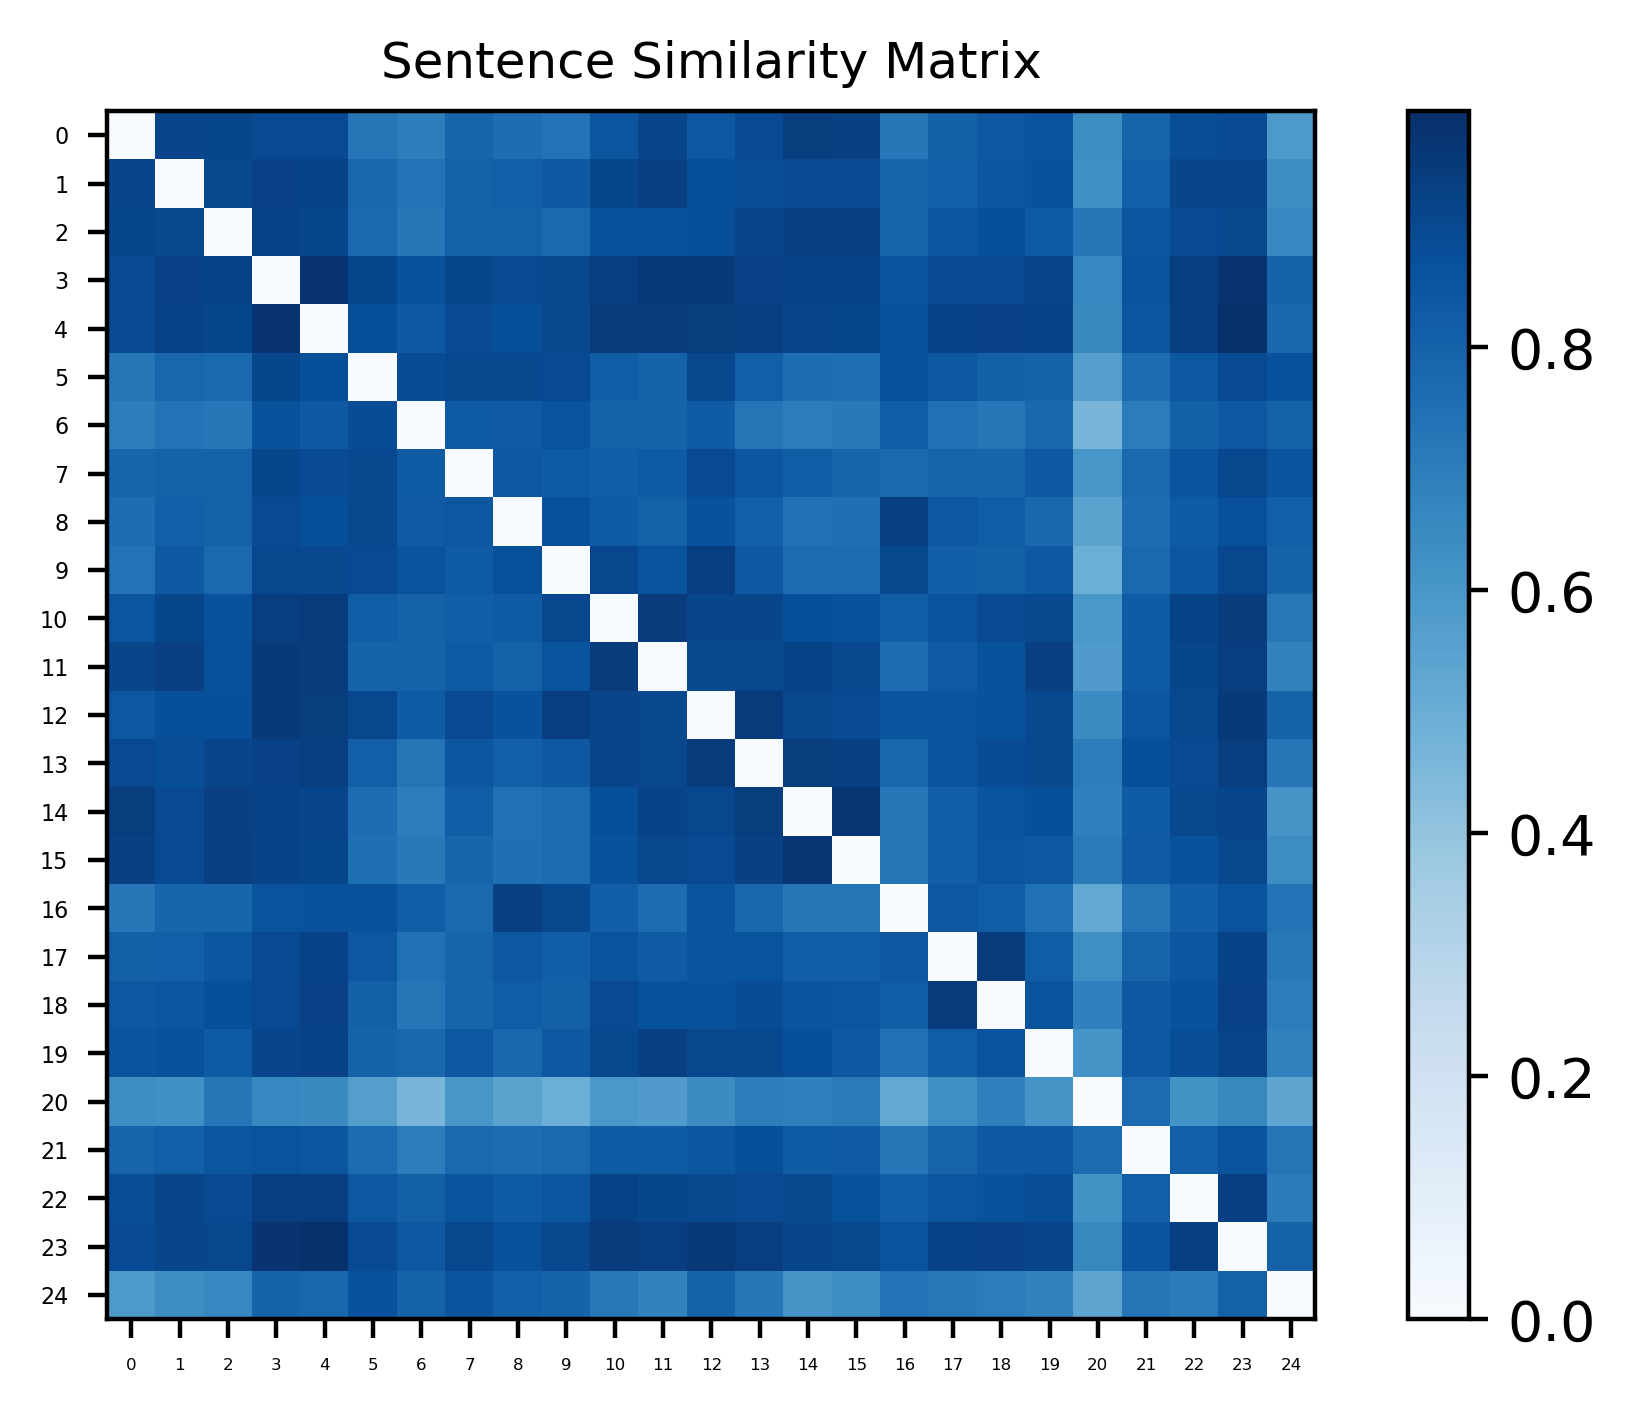

In [12]:
draw_heatmap(sim_mat)

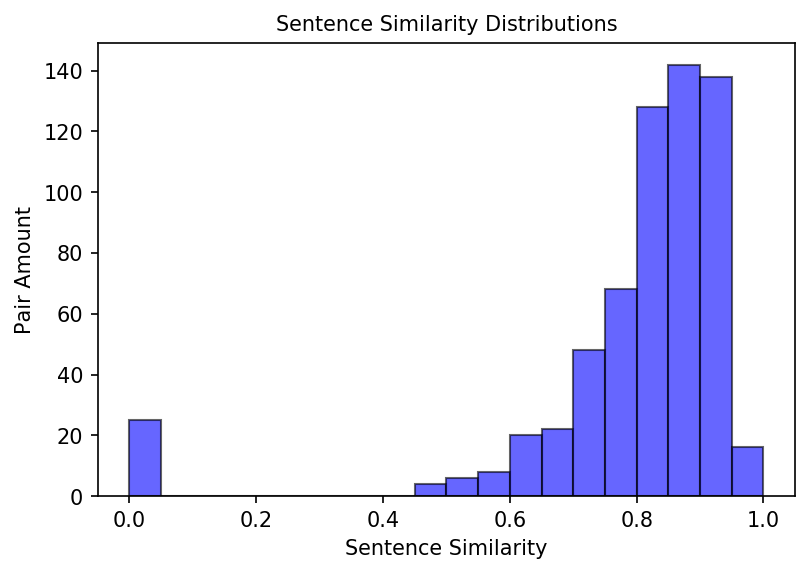

In [13]:
draw_hist(sim_mat)

In [14]:
# turn to graph
import networkx as nx
nx_graph = nx.from_numpy_array(sim_mat)

/home/i4a/anaconda3/envs/process/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


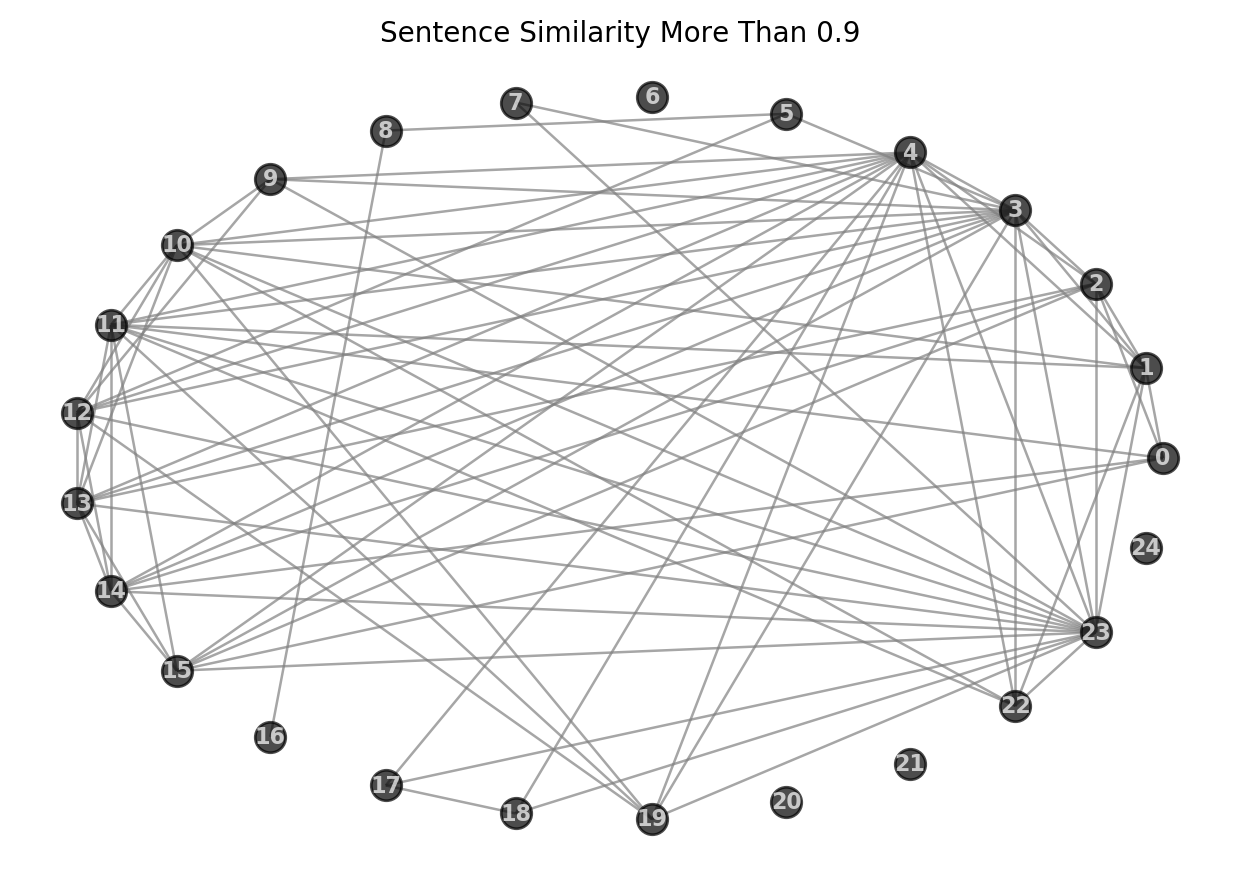

In [15]:
draw_graph(nx_graph, 0.9)

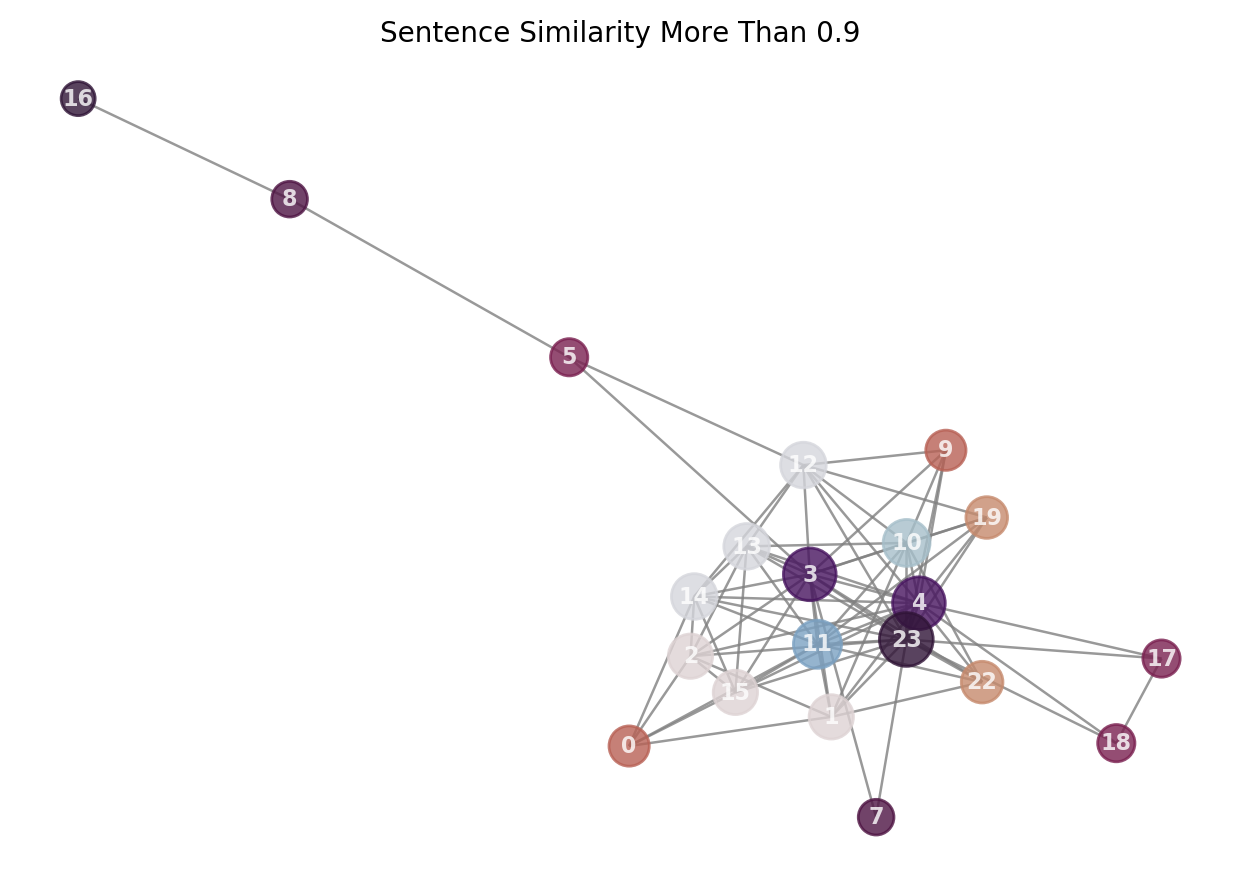

In [16]:
draw_sub_graph(nx_graph, 0.9)

In [17]:
# pagerank algorithm
scores = nx.pagerank(nx_graph)
scores

{0: 0.039668565907579556,
 1: 0.040583519807141887,
 2: 0.04068760530661592,
 3: 0.04291219289954573,
 4: 0.042777139049312664,
 5: 0.03972652524697466,
 6: 0.03766018445636185,
 7: 0.039802409494535534,
 8: 0.03953087668243571,
 9: 0.03994869929298295,
 10: 0.04132998167898552,
 11: 0.041176027914989324,
 12: 0.04205602732128983,
 13: 0.04155114253080961,
 14: 0.04052434803140452,
 15: 0.040327764880925314,
 16: 0.03855977399310816,
 17: 0.040005559415700206,
 18: 0.04053636211525224,
 19: 0.040388177944813634,
 20: 0.031435024793608136,
 21: 0.03907418749856792,
 22: 0.04122213187912629,
 23: 0.042844547554519136,
 24: 0.035671224303413754}

In [18]:
# ranked sentence
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(raw_sent)), reverse=True)
ranked_sentences

[(0.04291219289954573,
  'The 38th Session of the Assembly, held in Montréal from 24 September to 4 October 2013, adopted Assembly Resolutions A38-3: Protection of certain accident and incident records and A38-4: Protecting information from safety data collection and processing systems in order to maintain and improve aviation safety, instructing the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Management, other Annexes as appropriate, and related guidance material.'),
 (0.042844547554519136,
  'In response to Assembly Resolutions A38-3 and A38-4, the Council adopted new amendments to Annexes 13, 19 and 6 which provide more practical and effective means to accord protection to: accident and incident investigation records, safety data, safety information and related sou

### Step 4. Get the result - a summary.
You can modify the number below to choose how many sentences would you like in your summary.

In [19]:
# extract as summary
extract_summary = give_summary(ranked_sentences, 5)
extract_summary

'The 38th Session of the Assembly, held in Montréal from 24 September to 4 October 2013, adopted Assembly Resolutions A38-3: Protection of certain accident and incident records and A38-4: Protecting information from safety data collection and processing systems in order to maintain and improve aviation safety, instructing the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Management, other Annexes as appropriate, and related guidance material. In response to Assembly Resolutions A38-3 and A38-4, the Council adopted new amendments to Annexes 13, 19 and 6 which provide more practical and effective means to accord protection to: accident and incident investigation records, safety data, safety information and related sources, and flight recorder recordings in normal operatio

### Step 5. Evaluation by ROUGE (https://github.com/pltrdy/rouge).

In [20]:
# get the summary already in the working paper as a reference
refer_summary, action = get_summary_plumber(content_plumber)
refer_summary

'The protection of safety information is essential to ensure its continued availability, since the use of safety information for purposes other than maintaining or improving safety may inhibit the future availability of such information, with an adverse effect on safety. Assembly Resolutions A38-3 and A38-4 instructed the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Management, other Annexes as appropriate, and related guidance material. Accordingly, the Council adopted new amendments to Annexes 13, 19 and Annex 6 — Operation of Aircraft, which provide more practical and effective means to accord protection to certain accident and incident investigation records; safety data, safety information and related sources; and flight recorder recordings in normal operations. Th

In [21]:
# get the number of sentences in the reference summary
from nltk.tokenize import sent_tokenize
sent_num = len(sent_tokenize(refer_summary))
sent_num

4

In [22]:
# get extract summary with the same number of sentences in the reference summary
extract_summary = give_summary(ranked_sentences, sent_num)
extract_summary

'The 38th Session of the Assembly, held in Montréal from 24 September to 4 October 2013, adopted Assembly Resolutions A38-3: Protection of certain accident and incident records and A38-4: Protecting information from safety data collection and processing systems in order to maintain and improve aviation safety, instructing the Council, inter alia, to take such steps as may be necessary to ensure meaningful progress toward the development of new and/or enhanced provisions for the protection of safety information in Annex 13 — Aircraft Accident and Incident Investigation, Annex 19 — Safety Management, other Annexes as appropriate, and related guidance material. In response to Assembly Resolutions A38-3 and A38-4, the Council adopted new amendments to Annexes 13, 19 and 6 which provide more practical and effective means to accord protection to: accident and incident investigation records, safety data, safety information and related sources, and flight recorder recordings in normal operatio

In [23]:
# In acadamic, the score rouge-l drops in range 20-40% for now for a task summarization.
# get the rouge score
from rouge import Rouge
rouge = Rouge()
rouge_score = rouge.get_scores(extract_summary, refer_summary)
print("ROUGE-1: " + str(rouge_score[0]["rouge-1"]))
print("ROUGE-2: " + str(rouge_score[0]["rouge-2"]))
print("ROUGE-L: " + str(rouge_score[0]["rouge-l"]))

ROUGE-1: {'f': 0.6399999950285433, 'p': 0.5950413223140496, 'r': 0.6923076923076923}
ROUGE-2: {'f': 0.5592705117676298, 'p': 0.5082872928176796, 'r': 0.6216216216216216}
ROUGE-L: {'f': 0.6328159714124093, 'p': 0.5950413223140496, 'r': 0.6923076923076923}


### Extra Step. Hyper-parameter.
It is true we will get different rouge score if we choose different number of sentences as a summary. 

So how many sentences we will choose?

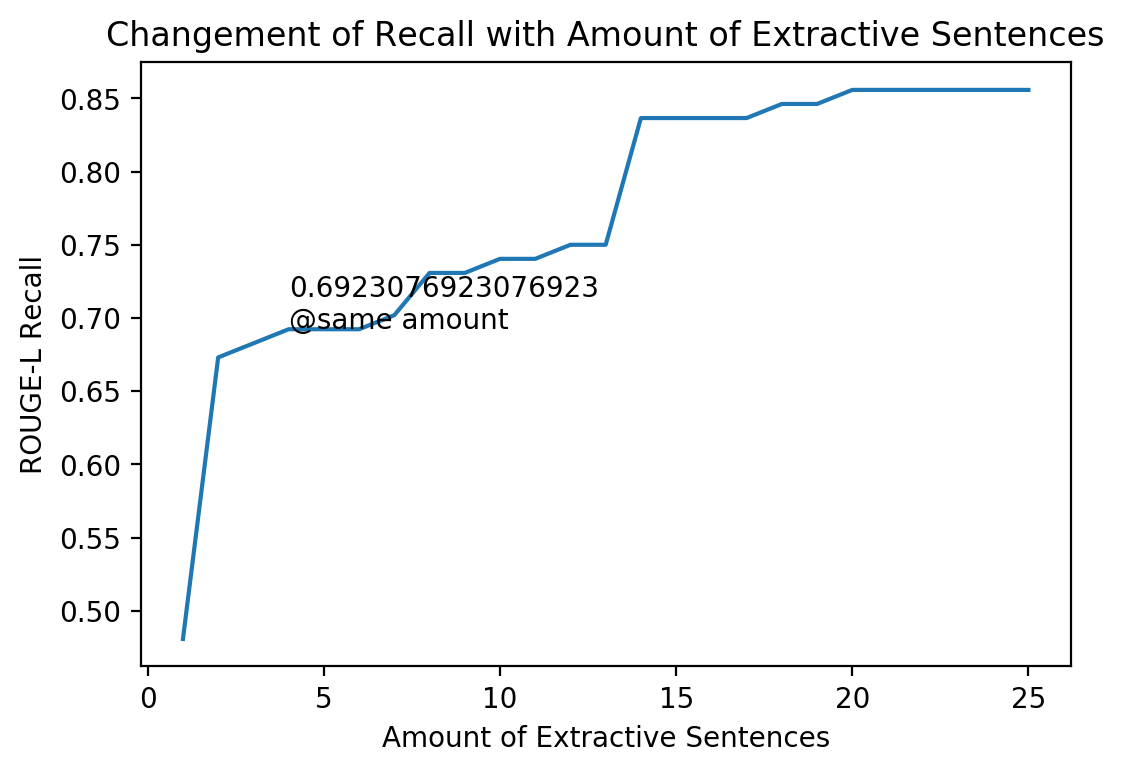

In [24]:
# draw a figure shows the changement of the score rouge-l with changement of number of sentences
x = range(1, len(raw_sent)+1)
y = []
for i in x:
    extract_summary = ''
    for m in range(i):
        extract_summary += ranked_sentences[m][1]   
    rouge_score = rouge.get_scores(extract_summary, refer_summary)
    y.append(rouge_score[0]["rouge-l"]['r'])
plt.figure(dpi = 200)
plt.plot(x, y) 
plt.text(sent_num, y[sent_num-1], str(y[sent_num-1])+"\n@same amount")
plt.xlabel("Amount of Extractive Sentences")
plt.ylabel("ROUGE-L Recall") 
plt.title("Changement of Recall with Amount of Extractive Sentences") 
plt.show() 

when x=25, it means:
    
Although we extract all text as a 'summary', in the evaluation metric ROUGE-L, the recall is not 1. It means the reference summary has the words that are not in the main body.